In [1]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
co = pymysql.connect(host='132.248.3.66', db='3MdB', 
                     user='OVN_user', passwd='oiii5007') 

In [38]:
res = pd.read_sql("""SELECT 
OXYGEN as O,
NITROGEN as N,
logU_mean,
Hbfrac,
atm1 as teff,
lumi,
dens,
HE_2__4686A,
H__1__4861A
FROM tab 
WHERE ref like 'PNe_2014' 
AND abs(HE_2__4686A/H__1__4861A - 0.7) / 0.7 < 0.25
AND abs(TOTL__7325A/O__3__5007A - 8/850.) / (8/850.) < 0.25 
AND abs((S_II__6731A+S_II__6716A)/S__3__6312A - 15 ) / 15 < 0.25
AND abs(TOTL__4363A/O__3__5007A - 28/850) / (28/850) < 10.4
AND abs(O__3__5007A/H__1__4861A - 8.5) / 8.5 < 0.25
AND abs(N__2__6584A/H__1__4861A - 4.5) / 4.5 < 0.25
""", 
con=co)

In [39]:
len(res)

25

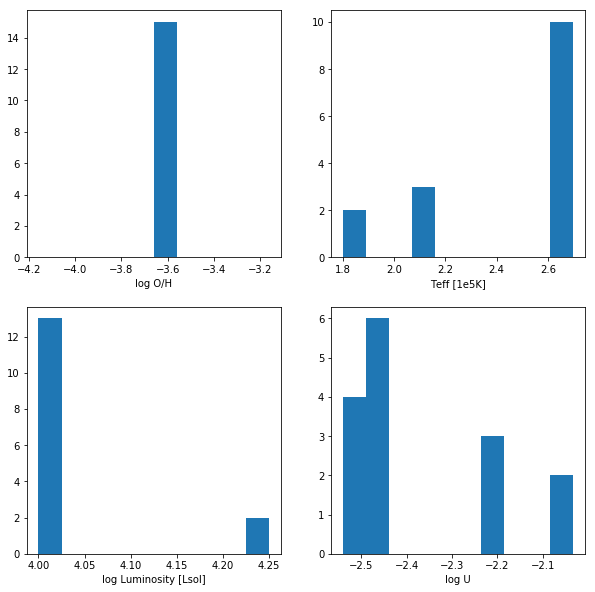

In [31]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
ax1.hist(res['O'])
ax1.set_xlabel('log O/H')
ax2.hist(res['teff']/1e5)
ax2.set_xlabel('Teff [1e5K]')
ax3.hist(res['lumi'])
ax3.set_xlabel('log Luminosity [Lsol]')
ax4.hist(res['logU_mean'])
ax4.set_xlabel('log U');